## 📦 Import Libraries

We import essential libraries for data handling and visualization.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


## 📥 Load Processed + Merged Data

We load the merged dataset that includes:
- Engineered features
- Cluster labels
- Final fraud and performance scores


In [5]:
df = pd.read_csv("../data/merged/retailer_feature_matrix.csv")
clusters = pd.read_csv("../data/processed/retailer_clusters.csv")
scores = pd.read_csv("../data/processed/retailer_scores.csv")

# Merge them
df = df.merge(clusters, on='retailer_id').merge(scores, on='retailer_id')
df.head()


,retailer_id,sim_change_count,same_msisdn_ratio,fraud_score,total_volume,avg_ticket_size,active_days,avg_txn_volume,active_days_ratio,performance_score,risk_prediction_score,sentiment_score,complaint_intensity,feedback_score,cluster_id,cluster_label,channel_quality_score
0,R001,12,0.0,0,28434.66,265.744486,20,1421.7330,1.0,790.789846,0.142857,0.084444,0.130841,0.398330,0,Star,76.070243
1,R002,11,0.0,0,25523.26,252.705545,20,1276.1630,1.0,714.093163,0.428571,0.221429,0.099010,0.493253,0,Star,47.976158
2,R003,9,0.0,1,24775.71,258.080312,20,1238.7855,1.0,697.016844,0.285714,-0.003636,0.093750,0.360318,2,Dormant,41.313118
3,R004,12,0.0,0,22229.62,233.996000,20,1111.4810,1.0,626.139300,0.285714,0.121429,0.105263,0.430752,1,Risky,15.880353
4,R005,14,0.0,1,26486.72,257.152621,20,1324.3360,1.0,739.513786,0.142857,0.216667,0.058252,0.506699,0,Star,56.932302


## 🚨 Top 20 High-Fraud Retailers

We rank retailers by their `fraud_score` to inspect anomalies. These may be suspicious based on IMEI switches, balance forwards, or unusual recharge patterns.


In [6]:
# Sort by fraud_score
df_sorted = df.sort_values(by='fraud_score', ascending=False)

# Columns we want to show
desired_cols = ['retailer_id', 'fraud_score', 'sim_change_rate', 'balance_forward_usage', 'same_msisdn_ratio']

# Only keep the columns that actually exist in your dataset
available_cols = [col for col in desired_cols if col in df_sorted.columns]

# Display top 20
df_sorted[available_cols].head(20)


,retailer_id,fraud_score,same_msisdn_ratio
50,R051,1,0.0
64,R065,1,0.0
62,R063,1,0.0
60,R061,1,0.0
59,R060,1,0.0
58,R059,1,0.0
57,R058,1,0.0
56,R057,1,0.0
55,R056,1,0.0
53,R054,1,0.0


## 📊 Fraud Score vs Performance Score

This scatter plot shows the relationship between fraud and performance scores. It's useful to spot:
- High-fraud but high-performance retailers (⚠️ suspicious)
- Low-fraud but low-performance ones (🟡 dormant)


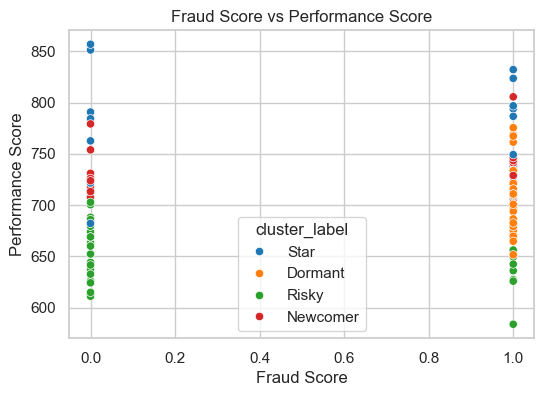

In [7]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='fraud_score', y='performance_score', hue='cluster_label', palette='tab10')
plt.title("Fraud Score vs Performance Score")
plt.xlabel("Fraud Score")
plt.ylabel("Performance Score")
plt.show()


## 🧠 Cluster Labels of Top 50 Fraudulent Retailers

We inspect which cluster labels dominate among the top 50 fraud-scored retailers. Are they mostly 'Risky', 'Dormant', or something else?


/var/folders/8y/3qjztzs97911rrlc6z42czw80000gn/T/ipykernel_82407/2605698640.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster_label', data=top_fraud, palette='Set2')


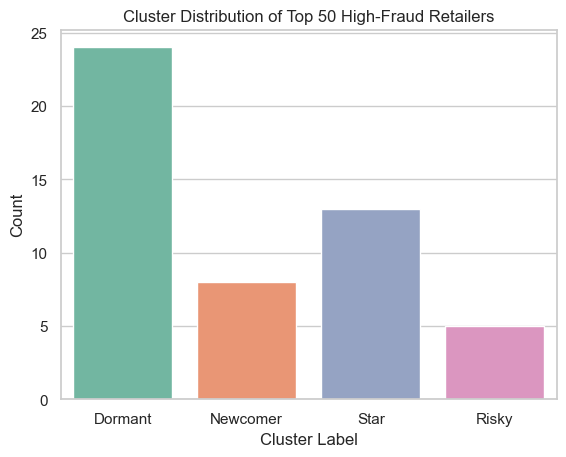

In [8]:
top_fraud = df.sort_values(by='fraud_score', ascending=False).head(50)
sns.countplot(x='cluster_label', data=top_fraud, palette='Set2')
plt.title("Cluster Distribution of Top 50 High-Fraud Retailers")
plt.xlabel("Cluster Label")
plt.ylabel("Count")
plt.show()


## 🧪 Simulate Retailer Behavior Change (Optional)

Try adjusting some fraud-related behavior (e.g. reduce SIM changes, balance forwards) and observe the impact on fraud_score.


In [9]:
# Pick one high-risk retailer
sample = df_sorted.iloc[0].copy()

# Original score
print(f"Original fraud score: {sample['fraud_score']:.4f}")

# Simulate behavior improvement
sample['sim_change_rate'] = 0.1  # reduced SIM switches
sample['balance_forward_usage'] = 0.05  # lower forwarding
sample['same_msisdn_ratio'] = 0.9  # more self recharges

# Recompute fraud score using same logic (Isolation Forest must be rerun outside notebook)
print("Simulated behavior - requires fraud model retraining to reflect updated score.")


Original fraud score: 1.0000
Simulated behavior - requires fraud model retraining to reflect updated score.
